# Actividad 2_10: Repaso

En esta Actividad vamos a repasar los conceptos que hemos visto hasta ahora en clase.

Descarga el archivo "Top 100 Cryptocurrency 2022.csv" que se adjunta con la tarea y realiza los siguientes apartados:

Debes escribir una programa que realice las siguientes tareas:

1. Importar los datos del dataset adjunto con la tarea y guardarlos en un DataFrame.
2. Crea una función que reciba un número (debes tratar la excepción en caso de que no sea un entero) y el dataframe y devuelva un DataFrame en el que haya eliminado todas las criptomonedas que no superen el número pasado como parámetro. Prueba la función.
3. Normaliza la columna del precio actual de las criptomonedas ("Price") y muestre una gráfica con los valores de las 10 que tienen mayor valor.
4. Predice el próximo valor de las criptomonedas suponiendo que la variación de las próximas 24h  va a ser la misma que en las anteriores ('Changes 24H') y mételo en una columna nueva.

           Crypto Name    Precio  Cambios 24H
0              BITCOIN  36983.00        -2.97
1      WRAPPED BITCOIN  37019.00        -2.84
2           HUOBI BTC   36942.00        -4.24
3             ETHEREUM   2510.00        -3.64
4   LIDO STAKED ETHER    2494.00        -3.23
..                 ...       ...          ...
95               ECOMI      0.01        -6.53
96          BITTORRENT      0.00         0.00
97            SAFEMOON      0.00        -3.19
98               ECASH      0.00        -3.71
99           SHIBA INU      0.00        -6.68

[100 rows x 3 columns]
          Crypto Name   Precio  Cambios 24H
0             BITCOIN  36983.0        -2.97
1     WRAPPED BITCOIN  37019.0        -2.84
2          HUOBI BTC   36942.0        -4.24
3            ETHEREUM   2510.0        -3.64
4  LIDO STAKED ETHER    2494.0        -3.23
          Crypto Name       Precio  Cambios 24H
1     WRAPPED BITCOIN  1465.831898        -2.84
0             BITCOIN  1464.406296        -2.97
2          HUOBI

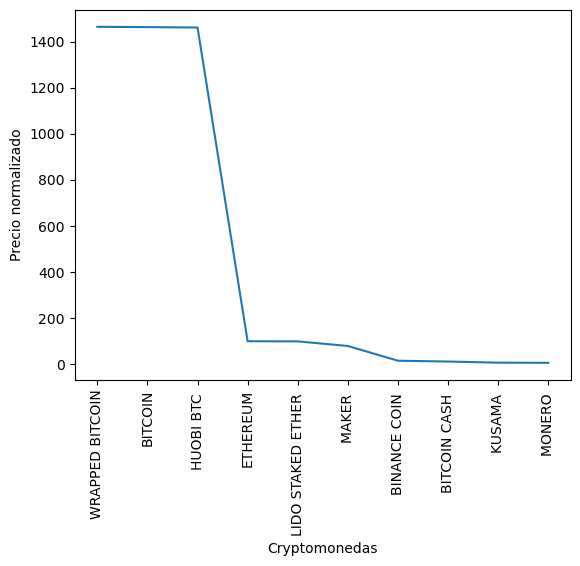

,Crypto Name,Precio Predecido
0,BITCOIN,35884.6049
1,WRAPPED BITCOIN,35967.6604
2,HUOBI BTC,35375.6592
3,ETHEREUM,2418.6360
4,LIDO STAKED ETHER,2413.4438


In [ ]:
import pandas as pd
from sklearn.preprocessing import *
import matplotlib.pyplot as plt

# Cargar dataframe, mostrando como cargar csv que tenga otro separador
df_cripto = pd.read_csv("Top 100 Cryptocurrency 2022.csv")
#df_cripto = pd.read_csv("Top 100 Cryptocurrency 2022.csv", sep="")

# Crear funcion la cual reciba un número entero
precios = []
limite_mercado = []
crypto = []
cambios_24h = []

# Función que limpia
def limpiados(n):
    if type(n) == float:
        # Normalizar valores
        for row in df_cripto.iterrows():
            crypto = df_cripto["Crypto Name"]
            precios = df_cripto["Price"].str.replace("$", "").str.replace(",", "").str.replace("\"", "").astype(float)
            #precios = df_cripto["Price"].str.replace(r'[\$,"]', '', regex=True).astype(float)
            cambios_24h = df_cripto["Changes 24H "].str.replace("%", "").str.replace("$", "").astype(float) 

        df_limpio = pd.DataFrame({"Crypto Name": crypto, "Precio": precios, "Cambios 24H" : cambios_24h})
        print(df_limpio)

       # Filtrar por precio
        df_limpio = df_limpio.loc[df_limpio["Precio"] > n]
        print(df_limpio.head())

        # Crear df_normalizado y luego normalizar el precio
        df_normalizado = pd.DataFrame({"Crypto Name": crypto, "Precio": precios, "Cambios 24H": cambios_24h})
        escalador = RobustScaler()
        df_normalizado[["Precio"]] = escalador.fit_transform(df_normalizado[["Precio"]])

        # Obtener el top 10 por Precio normalizado
        top10 = df_normalizado.sort_values(by="Precio", ascending=False, inplace=False).head(10)
        # Se pone inplace=True, si no se le iguala a una variable para guardar
        print(top10)

        # Mostrar la gráfica
        plt.plot(top10["Crypto Name"], top10["Precio"])
        plt.xlabel("Cryptomonedas")
        plt.ylabel("Precio normalizado")
        plt.xticks(rotation=90)
        plt.show()  

        # Predice el precio de las criptomonedas al día siguiente
        precio_predecido = df_limpio["Precio"] * (1 + df_limpio["Cambios 24H"] / 100)
        df_predictor = pd.DataFrame({"Crypto Name": crypto, "Precio Predecido" : precio_predecido})
        return df_predictor.head()
    else:
        print("Mete un número decimal")

limpiados(80.0)